In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
from rlway.pyosrd import OSRD

In [123]:
OSRD.use_cases

['c1',
 'c1y2',
 'c2x2',
 'c2xx2',
 'c2y1y2',
 'c2z2z2',
 'c3y1',
 'cvg_dvg',
 'point_switch',
 'station_capacity2',
 'straight_line']

In [124]:
use_case='c3y1'
sim = OSRD(use_case=use_case, dir='tmp')

[11:17:12,727] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[11:17:12,759] [INFO]              [FullInfra] parsing infra
[11:17:12,816] [INFO]              [FullInfra] adaptation to kotlin
[11:17:12,848] [INFO]              [FullInfra] loading signals
[11:17:12,853] [INFO]              [FullInfra] building blocks
[11:17:12,858] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[11:17:12,870] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.48
[11:17:12,910] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.49
[11:17:12,915] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.50
[11:17:12,919] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.51
[11:17:12,924] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.52
[11:17:12,927] [INFO]  [StandaloneSimulationCommand] Running simulati

In [125]:
sim.train_track_sections(1)

[{'id': 'T1', 'direction': 'START_TO_STOP'},
 {'id': 'T3', 'direction': 'START_TO_STOP'},
 {'id': 'T4', 'direction': 'START_TO_STOP'}]

In [126]:
sim.space_time_chart_plotly(1, points_to_show=['station','switch'], eco_or_base='base')

In [127]:
from rlway.schedule_from_osrd import schedule_from_osrd

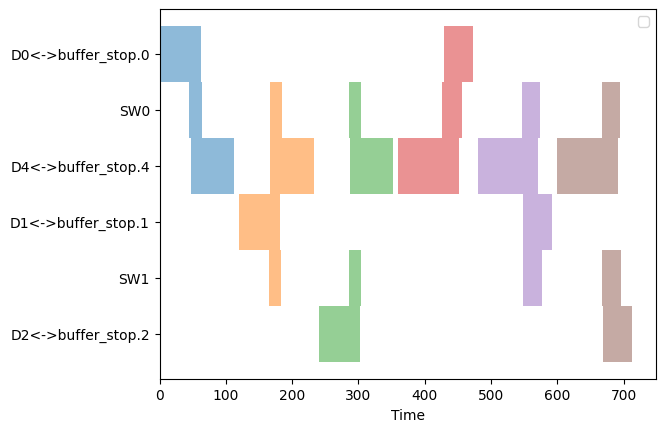

In [128]:
s = schedule_from_osrd(sim, eco_or_base='base')
ax = s.sort().plot()
ax.invert_yaxis()
ax.legend('')

In [129]:
s.draw_graph()

In [130]:
sim.tvd_blocks

{'D0<->buffer_stop.0': 'D0<->buffer_stop.0',
 'D0<->D4': 'SW0',
 'D4<->buffer_stop.4': 'D4<->buffer_stop.4',
 'D1<->buffer_stop.1': 'D1<->buffer_stop.1',
 'D1<->D3': 'SW1',
 'D3<->D4': 'SW0',
 'D2<->buffer_stop.2': 'D2<->buffer_stop.2',
 'D2<->D3': 'SW1'}

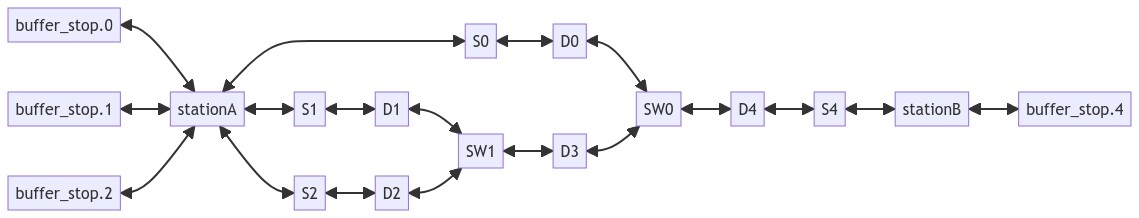

In [131]:
s = schedule_from_osrd(sim, eco_or_base='eco')

g = 'graph LR;'

for _, points in sim.points_on_track_sections().items():
    for i, _ in enumerate(points[:-1]):
        g += (f"{points[i].id}<-->{points[i+1].id};")


import base64
import os
import requests
import shutil

from PIL import Image

graphbytes = g.encode("ascii")
base64_bytes = base64.b64encode(graphbytes)
base64_string = base64_bytes.decode("ascii")


url = "https://mermaid.ink/img/" + base64_string
response = requests.get(url, stream=True)
with open('tmp.png', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
del response
image = Image.open('tmp.png')
os.remove('tmp.png')

image